<a href="https://colab.research.google.com/github/nessy254/Customer_churn/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nessy254/Customer_churn.git

Cloning into 'Customer_churn'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [90]:
ls


churn-bigml-80.csv  Customer_churn/  sample_data/


In [91]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#load the dataset
data = pd.read_csv('churn-bigml-80.csv')
data.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [105]:
#loading the test data
test_data = pd.read_csv('churn-bigml-20.csv')
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [93]:
#There are no missing values in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [94]:
#checking for duplicates
data.duplicated().sum()

0

In [95]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [106]:
data.rename(columns = {'International plan':'International_plan'}, inplace = True)
data.rename(columns = {'Voice mail plan':'Voice_mail_plan'}, inplace = True)
data

test_data.rename(columns = {'International plan':'International_plan'}, inplace = True)
test_data.rename(columns = {'Voice mail plan':'Voice_mail_plan'}, inplace = True)
test_data


,State,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [107]:
data.Churn = data.Churn.replace({True: 1, False: 0})
data.International_plan = data.International_plan.replace({'Yes': 1, 'No': 0})
data.Voice_mail_plan = data.Voice_mail_plan.replace({'Yes': 1, 'No': 0})
data

test_data.Churn = test_data.Churn.replace({True: 1, False: 0})
test_data.International_plan = test_data.International_plan.replace({'Yes': 1, 'No': 0})
test_data.Voice_mail_plan = test_data.Voice_mail_plan.replace({'Yes': 1, 'No': 0})
test_data

,State,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [98]:
data['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

<Axes: xlabel='Total night calls', ylabel='Count'>

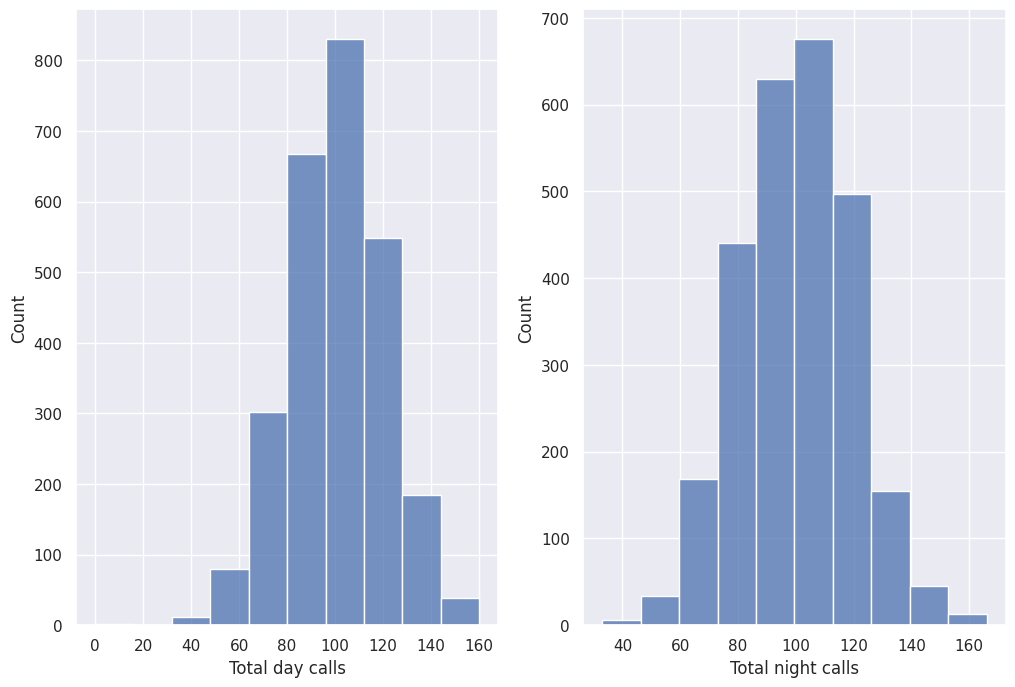

In [99]:
sns.set()
fig,ax = plt.subplots(1, 2, figsize=(12,8))
sns.histplot(x='Total day calls', data = data, ax=ax[0], bins=10)
sns.histplot(x='Total night calls', data= data, ax=ax[1], bins=10)

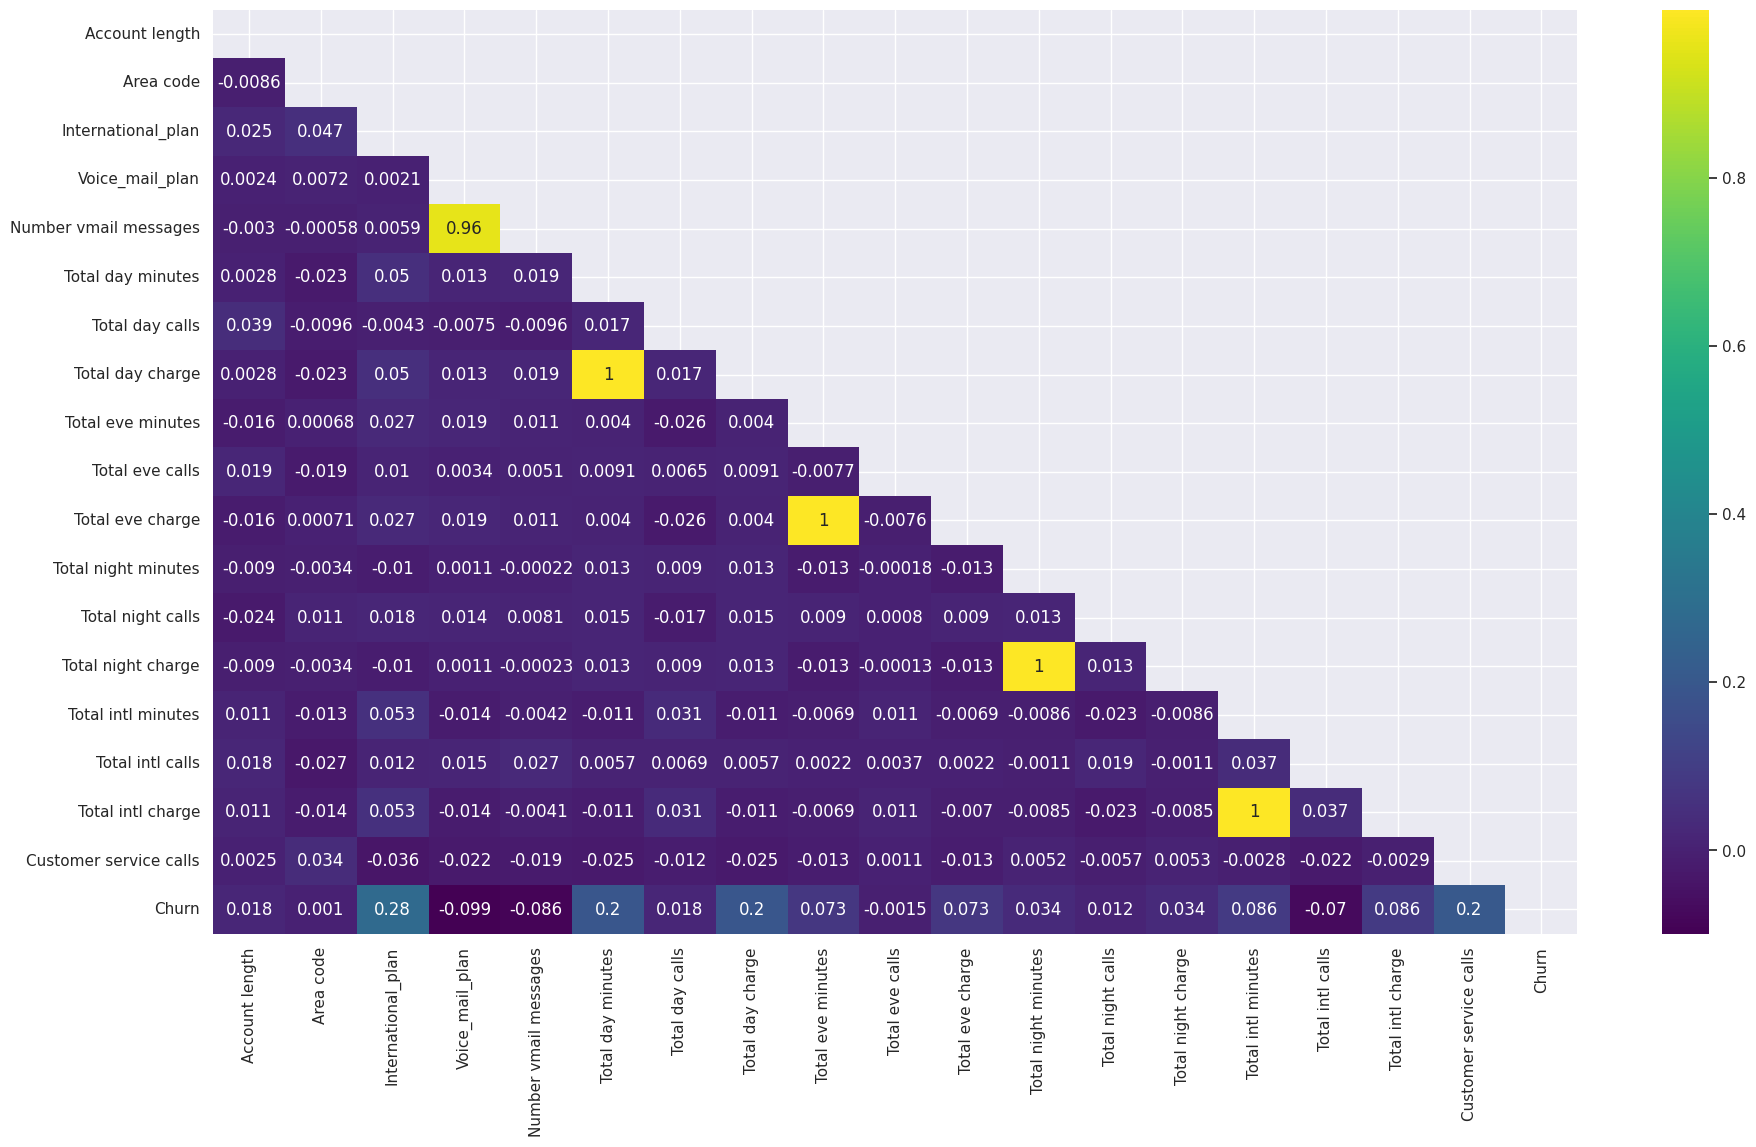

In [102]:
#checking correlation
plt.figure(figsize=(22,12))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='viridis', mask = mask)
plt.show()

In [109]:
cols_to_drop = ['Total eve charge', 'Total night charge', 'Total intl charge', 'State']
#data.drop(cols_to_drop, axis = 1, inplace = True)
test_data.drop(cols_to_drop, axis = 1, inplace = True)

In [110]:
test_data

,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,408,0,0,0,184.5,97,31.37,351.6,80,215.8,90,8.7,4,1,0
1,65,415,0,0,0,129.1,137,21.95,228.5,83,208.8,111,12.7,6,4,1
2,161,415,0,0,0,332.9,67,56.59,317.8,97,160.6,128,5.4,9,4,1
3,111,415,0,0,0,110.4,103,18.77,137.3,102,189.6,105,7.7,6,2,0
4,49,510,0,0,0,119.3,117,20.28,215.1,109,178.7,90,11.1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,1,26,137.1,88,23.31,155.7,125,247.6,94,11.5,7,2,0
663,106,408,0,1,29,83.6,131,14.21,203.9,131,229.5,73,8.1,3,1,0
664,60,415,0,0,0,193.9,118,32.96,85.0,110,210.1,134,13.2,8,3,0
665,159,415,0,0,0,169.8,114,28.87,197.7,105,193.7,82,11.6,4,1,0


# Building the models

Decision Trees


In [131]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier

X_train = data.drop(['Churn'], axis = 1)
X_test = test_data.drop(['Churn'], axis = 1)

y_train = data['Churn']
y_test = test_data['Churn']



In [132]:
Dt_model = DecisionTreeClassifier()


In [133]:
Dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [135]:
#accuracy of the test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
Dt_test = Dt_model.predict(X_test)
Dt_acc = accuracy_score(y_test, Dt_test)
Dt_acc


0.9055472263868066

Random Forest Classifier

In [136]:
#Random forests
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [138]:
# Now, evaluate the model on the test set
RFC_test_pred = RFC_model.predict(X_test)
RFC_test_acc = accuracy_score(y_test, RFC_test_pred)

print("Test Set Accuracy:", RFC_test_acc)

Test Set Accuracy: 0.9535232383808095


Logistic Regression

In [140]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [142]:
#test accuracy
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predict_test)
accuracy_test

0.856071964017991